<a href="https://colab.research.google.com/github/harisghafoor/Customer_Churn/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineeting:
We have already performed the EDA and we now which features are the decisive ones and which features are unnecessary for training. So, we will start our analysis from Feature Correlation with the target Variable.

In [1]:
#import the required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [2]:
telco_base_data=pd.read_csv("cell2celltrain.csv")
#df_test=pd.read_csv("cell2cellholdout.csv")
telco_base_data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


# Step 2: Data Cleaning


**1.** Create a copy of base data for manupulation & processing

In [3]:
telco_train = telco_base_data.copy()
telco_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [4]:
print("Any missing sample in training set:",telco_train.isnull().values.any())

Any missing sample in training set: True


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


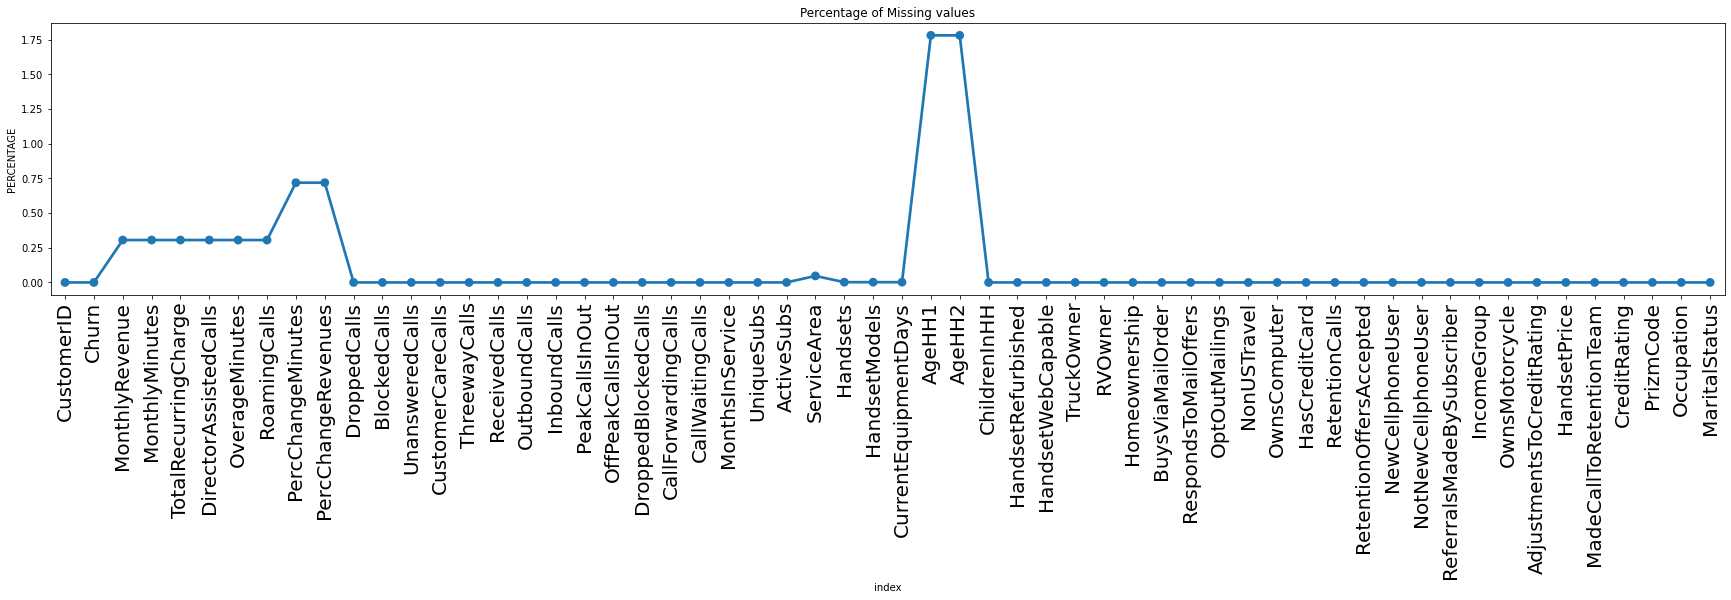

In [5]:
missing = pd.DataFrame((telco_train.isnull().sum())*100/telco_train.shape[0]).reset_index()
plt.figure(figsize=(30,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =20)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [6]:
telco_train.replace(np.nan, 0, inplace=True)
telco_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [7]:
telco_train.HandsetPrice=telco_train["HandsetPrice"].replace('Unknown', 'NaN')
telco_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,NaN,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10,No,1-Highest,Other,Professional,Yes


In [8]:
telco_train.HandsetPrice = pd.to_numeric(telco_train.HandsetPrice, errors='coerce')
telco_train.isnull().sum()

CustomerID                       0
Churn                            0
MonthlyRevenue                   0
MonthlyMinutes                   0
TotalRecurringCharge             0
DirectorAssistedCalls            0
OverageMinutes                   0
RoamingCalls                     0
PercChangeMinutes                0
PercChangeRevenues               0
DroppedCalls                     0
BlockedCalls                     0
UnansweredCalls                  0
CustomerCareCalls                0
ThreewayCalls                    0
ReceivedCalls                    0
OutboundCalls                    0
InboundCalls                     0
PeakCallsInOut                   0
OffPeakCallsInOut                0
DroppedBlockedCalls              0
CallForwardingCalls              0
CallWaitingCalls                 0
MonthsInService                  0
UniqueSubs                       0
ActiveSubs                       0
ServiceArea                      0
Handsets                         0
HandsetModels       

In [9]:
telco_train.loc[telco_train['HandsetPrice'].isnull() == True]

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,NaN,No,3-Good,Town,Crafts,Yes
28,3000174,Yes,16.14,4.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.0,1.0,1.7,0.0,0.0,0.2,0.0,0.0,3.0,0.7,1.0,0.0,0.0,55,1,1,OKCOKC405,1.0,1.0,1661.0,64.0,64.0,No,No,No,No,No,Known,Yes,Yes,No,Yes,Yes,Yes,0,0,Yes,No,0,6,No,0,NaN,No,1-Highest,Suburban,Professional,Yes
36,3000230,No,20.18,1.0,20.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.7,0.3,0.0,0.0,0.0,50,1,1,INDIND317,1.0,1.0,1536.0,46.0,0.0,No,No,No,No,No,Unknown,No,No,No,No,No,No,0,0,Yes,No,0,7,No,0,NaN,No,1-Highest,Town,Other,No
38,3000238,No,37.99,71.0,38.0,0.00,0.0,0.0,146.0,0.0,0.0,0.7,2.7,0.0,0.0,2.4,1.0,0.0,8.3,2.7,0.7,0.0,0.0,53,1,1,OMALNC402,1.0,1.0,1597.0,76.0,68.0,No,No,No,No,No,Known,No,No,No,No,No,Yes,0,0,No,No,0,7,No,0,NaN,No,1-Highest,Other,Other,Yes
43,3000290,No,17.43,20.0,17.0,0.00,1.0,0.0,15.0,1.3,0.3,2.3,5.3,1.0,0.0,3.7,0.0,0.0,5.3,1.0,2.7,0.0,0.0,56,1,1,NSHNSH615,1.0,1.0,1695.0,44.0,0.0,No,No,No,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,4,No,0,NaN,No,4-Medium,Town,Other,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51033,3399882,Yes,38.34,320.0,30.0,0.99,21.0,0.0,-66.0,-8.3,12.3,2.3,22.7,1.3,0.0,99.0,23.0,3.7,135.7,112.3,14.7,0.0,1.3,35,2,2,LAXANA714,1.0,1.0,945.0,36.0,34.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,6,No,0,NaN,No,1-Highest,Other,Professional,No
51035,3399894,No,0.00,76.0,30.0,0.00,0.0,0.0,0.0,0.0,5.7,1.0,13.0,0.7,0.0,11.2,5.7,0.0,29.3,17.0,6.7,0.0,0.0,30,1,1,NEVELC619,1.0,1.0,883.0,48.0,48.0,Yes,No,Yes,No,No,Known,No,No,No,No,Yes,Yes,0,0,No,No,0,4,No,0,NaN,No,2-High,Other,Professional,No
51037,3399906,No,31.92,63.0,17.0,0.00,43.0,0.0,-38.0,-13.2,0.7,0.0,8.7,0.0,0.0,14.0,0.0,0.0,16.0,14.7,0.7,0.0,0.3,30,1,1,NEVENC760,1.0,1.0,883.0,58.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,No,No,0,3,No,0,NaN,No,3-Good,Other,Other,Yes
51039,3399922,No,50.00,492.0,50.0,0.00,0.0,0.0,0.0,0.0,3.7,0.3,42.3,0.3,0.0,7.5,6.7,0.0,48.3,19.3,4.0,0.0,0.3,30,1,1,NEVPOW619,1.0,1.0,882.0,0.0,0.0,No,No,Yes,No,No,Unknown,No,No,No,No,No,No,0,0,No,No,0,0,No,0,NaN,No,6-VeryLow,Suburban,Other,Unknown


#### Replacing the HandsetPrice's Missing Value with Mean Value
Instead of ignoring this feature, we can replace the NaN with the mean values.


In [10]:
telco_train["HandsetPrice"]=telco_train["HandsetPrice"].replace(np.NaN,telco_train["HandsetPrice"].mean())
telco_train.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,SEAPOR503,2.0,2.0,361.0,62.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,Yes,Yes,1,0,No,No,0,4,No,0,30.000000,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,PITHOM412,2.0,1.0,1504.0,40.0,42.0,Yes,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,Yes,No,0,5,No,0,30.000000,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,MILMIL414,1.0,1.0,1812.0,26.0,26.0,Yes,No,No,No,No,Unknown,No,No,No,No,No,Yes,0,0,Yes,No,0,6,No,0,82.237933,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,PITHOM412,9.0,4.0,458.0,30.0,0.0,No,No,Yes,No,No,Known,Yes,Yes,No,No,No,Yes,0,0,Yes,No,0,6,No,0,10.000000,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,OKCTUL918,4.0,3.0,852.0,46.0,54.0,No,No,No,No,No,Known,Yes,Yes,No,No,Yes,Yes,0,0,No,Yes,0,9,No,1,10.000000,No,1-Highest,Other,Professional,Yes


In [11]:
telco_train.isnull().sum()

CustomerID                   0
Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
Children

In [12]:
telco_train['Churn'] = np.where(telco_train.Churn == 'Yes',1,0)

# Step 3: Label Encoding

In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
def FunLabelEncoder(df):
    for c in df.columns:
        if df.dtypes[c] == object:
            le.fit(df[c].astype(str))
            df[c] = le.transform(df[c].astype(str))
    return df

In [14]:
telco_train_dummy = FunLabelEncoder(telco_train)
telco_train_dummy.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ThreewayCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallForwardingCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,Homeownership,BuysViaMailOrder,RespondsToMailOffers,OptOutMailings,NonUSTravel,OwnsComputer,HasCreditCard,RetentionCalls,RetentionOffersAccepted,NewCellphoneUser,NotNewCellphoneUser,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.0,0.3,61,2,1,659,2.0,2.0,361.0,62.0,0.0,0,0,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,4,0,0,30.000000,1,0,2,4,0
1,3000010,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,0.0,58,1,1,611,2.0,1.0,1504.0,40.0,42.0,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0,0,5,0,0,30.000000,0,3,2,4,2
2,3000014,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,0.0,60,1,1,353,1.0,1.0,1812.0,26.0,26.0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,6,0,0,82.237933,0,2,3,1,2
3,3000022,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,1.3,200.3,370.3,147.0,555.7,303.7,59.7,0.0,22.7,59,2,2,611,9.0,4.0,458.0,30.0,0.0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,6,0,0,10.000000,0,3,0,3,0
4,3000026,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,564,4.0,3.0,852.0,46.0,54.0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,9,0,1,10.000000,0,0,0,4,2


In [15]:
telco_train.shape

(51047, 58)

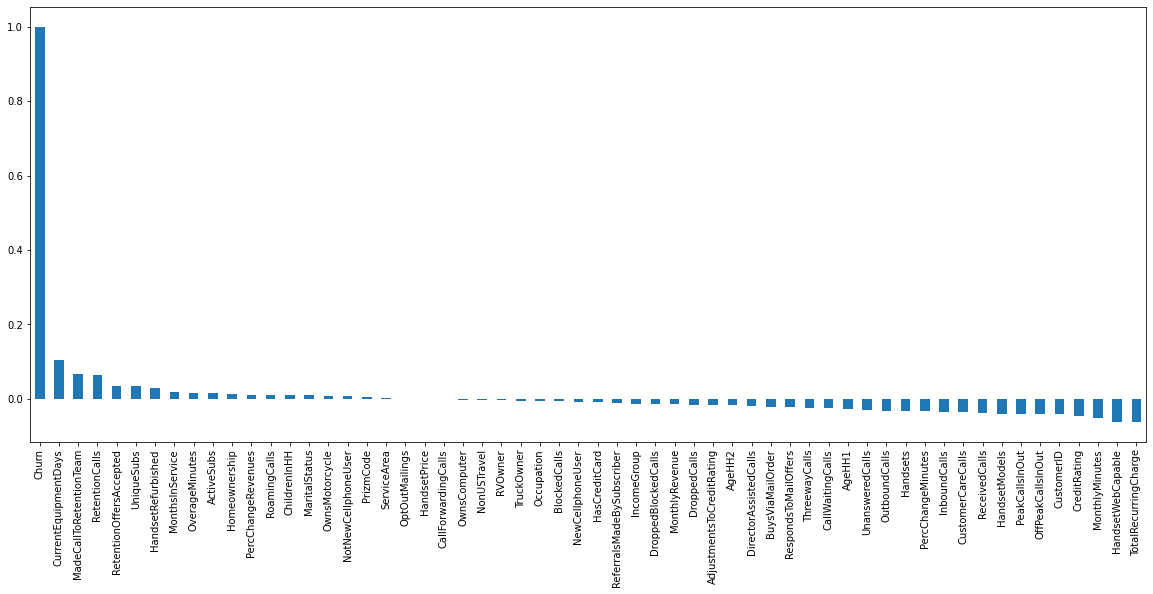

In [16]:
plt.figure(figsize=(20,8))
telco_train_dummy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

# Feature Selection Using Filtering Method

In [17]:
import numpy as np
df=telco_train_dummy
# name of the label (can be seen in the dataframe)
label = 'Churn'
# list with feature names (V1, V2, V3, ...)
features = df.columns.tolist()
features.remove(label)

In [18]:
from scipy.stats import pointbiserialr
from math import sqrt

def getMerit(subset, label):
    k = len(subset)

    # average feature-class correlation
    rcf_all = []
    for feature in subset:
        coeff = pointbiserialr( df[label], df[feature] )
        rcf_all.append( abs( coeff.correlation ) )
    rcf = np.mean( rcf_all )

    # average feature-feature correlation
    corr = df[subset].corr()
    corr.values[np.tril_indices_from(corr.values)] = np.nan
    corr = abs(corr)
    rff = corr.unstack().mean()

    return (k * rcf) / sqrt(k + k * (k-1) * rff)

In [19]:
best_value = -1
best_feature = ''
for feature in features:
    coeff = pointbiserialr( df[label], df[feature] )
    abs_coeff = abs( coeff.correlation )
    if abs_coeff > best_value:
        best_value = abs_coeff
        best_feature = feature

print("Feature %s with merit %.4f"%(best_feature, best_value))

Feature CurrentEquipmentDays with merit 0.1037


In [20]:
class PriorityQueue:
    def  __init__(self):
        self.queue = []

    def isEmpty(self):
        return len(self.queue) == 0
    
    def push(self, item, priority):
        """
        item already in priority queue with smaller priority:
        -> update its priority
        item already in priority queue with higher priority:
        -> do nothing
        if item not in priority queue:
        -> push it
        """
        for index, (i, p) in enumerate(self.queue):
            if (set(i) == set(item)):
                if (p >= priority):
                    break
                del self.queue[index]
                self.queue.append( (item, priority) )
                break
        else:
            self.queue.append( (item, priority) )
        
    def pop(self):
        # return item with highest priority and remove it from queue
        max_idx = 0
        for index, (i, p) in enumerate(self.queue):
            if (self.queue[max_idx][1] < p):
                max_idx = index
        (item, priority) = self.queue[max_idx]
        del self.queue[max_idx]
        return (item, priority)

In [21]:
queue = PriorityQueue()

# push first tuple (subset, merit)
queue.push([best_feature], best_value)

In [22]:
# list for visited nodes
visited = []

# counter for backtracks
n_backtrack = 0

# limit of backtracks
max_backtrack = 5

In [23]:
# repeat until queue is empty
# or the maximum number of backtracks is reached
while not queue.isEmpty():
    # get element of queue with highest merit
    subset, priority = queue.pop()
    
    # check whether the priority of this subset
    # is higher than the current best subset
    if (priority < best_value):
        n_backtrack += 1
    else:
        best_value = priority
        best_subset = subset

    # goal condition
    if (n_backtrack == max_backtrack):
        break
    
    # iterate through all features and look of one can
    # increase the merit
    for feature in features:
        temp_subset = subset + [feature]
        
        # check if this subset has already been evaluated
        for node in visited:
            if (set(node) == set(temp_subset)):
                break
        # if not, ...
        else:
            # ... mark it as visited
            visited.append( temp_subset )
            # ... compute merit
            merit = getMerit(temp_subset, label)
            # and push it to the queue
            queue.push(temp_subset, merit)

In [24]:
xs_train=telco_train_dummy[best_subset]
xs_train.head()

,CurrentEquipmentDays,MadeCallToRetentionTeam,TotalRecurringCharge,HandsetWebCapable,UniqueSubs,PercChangeMinutes,RetentionCalls,CreditRating
0,361.0,1,22.0,1,2,-157.0,1,0
1,1504.0,0,17.0,0,1,-4.0,0,3
2,1812.0,0,38.0,0,1,-2.0,0,2
3,458.0,0,75.0,1,2,157.0,0,3
4,852.0,0,17.0,0,2,0.0,0,0


# Random Forest Classifier for Features selected by Filtering Method

In [25]:
y=telco_train['Churn']
x=telco_train[best_subset]

In [26]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [27]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [28]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [31]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [32]:
yr_predict1 = model_rf_smote.predict(xr_test)

In [33]:
model_score_r1 = model_rf_smote.score(xr_test, yr_test)

In [34]:
print(model_score_r1)
print(metrics.classification_report(yr_test, yr_predict1))

0.7293061224489796
              precision    recall  f1-score   support

           0       0.71      0.59      0.64      2541
           1       0.74      0.83      0.78      3584

    accuracy                           0.73      6125
   macro avg       0.72      0.71      0.71      6125
weighted avg       0.73      0.73      0.72      6125



In [35]:
print(metrics.confusion_matrix(yr_test, yr_predict1))

[[1503 1038]
 [ 620 2964]]


# Random Forest Importance

In [36]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
import shap
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

     |████████████████████████████████| 564 kB 13.6 MB/s 


In [37]:
from sklearn.ensemble import RandomForestClassifier
Y=telco_train_dummy['Churn']
X=telco_train_dummy.drop('Churn',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=12)
rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [38]:
rf.feature_importances_

array([7.03547712e-02, 2.06654376e-02, 8.33812485e-02, 4.16750288e-02,
       4.54604130e-03, 2.33453296e-02, 8.37660857e-03, 4.87339845e-02,
       2.07990578e-02, 7.47620204e-03, 4.92564871e-03, 1.23065764e-02,
       1.44669527e-02, 1.83308780e-03, 1.12216208e-02, 1.22522654e-02,
       1.29856226e-02, 2.00805694e-02, 2.24232005e-02, 1.08180718e-02,
       0.00000000e+00, 5.13879112e-03, 1.43856093e-01, 8.78257879e-03,
       2.53913580e-03, 8.38998158e-03, 1.26323731e-02, 1.03197373e-02,
       1.98279644e-01, 2.46304547e-02, 6.36232250e-03, 9.06580976e-04,
       1.01165244e-02, 2.03943856e-02, 6.59115800e-04, 1.22785804e-04,
       1.57901888e-03, 2.01873532e-03, 3.61281584e-03, 4.93305169e-05,
       2.35814878e-04, 5.37423195e-04, 8.90878228e-04, 1.66240870e-02,
       2.03510741e-03, 5.29518295e-04, 9.18606685e-04, 3.87241394e-04,
       5.50386573e-03, 5.66831253e-04, 1.38922465e-03, 6.59471805e-03,
       1.78390918e-02, 2.66195815e-02, 2.24614431e-03, 2.18575433e-03,
      

In [39]:
telco_train_dummy.columns.values

array(['CustomerID', 'Churn', 'MonthlyRevenue', 'MonthlyMinutes',
       'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'BlockedCalls', 'UnansweredCalls',
       'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls',
       'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'ReferralsMadeBySubscriber', 'In

Text(0.5, 0, 'Random Forest Feature Importance')

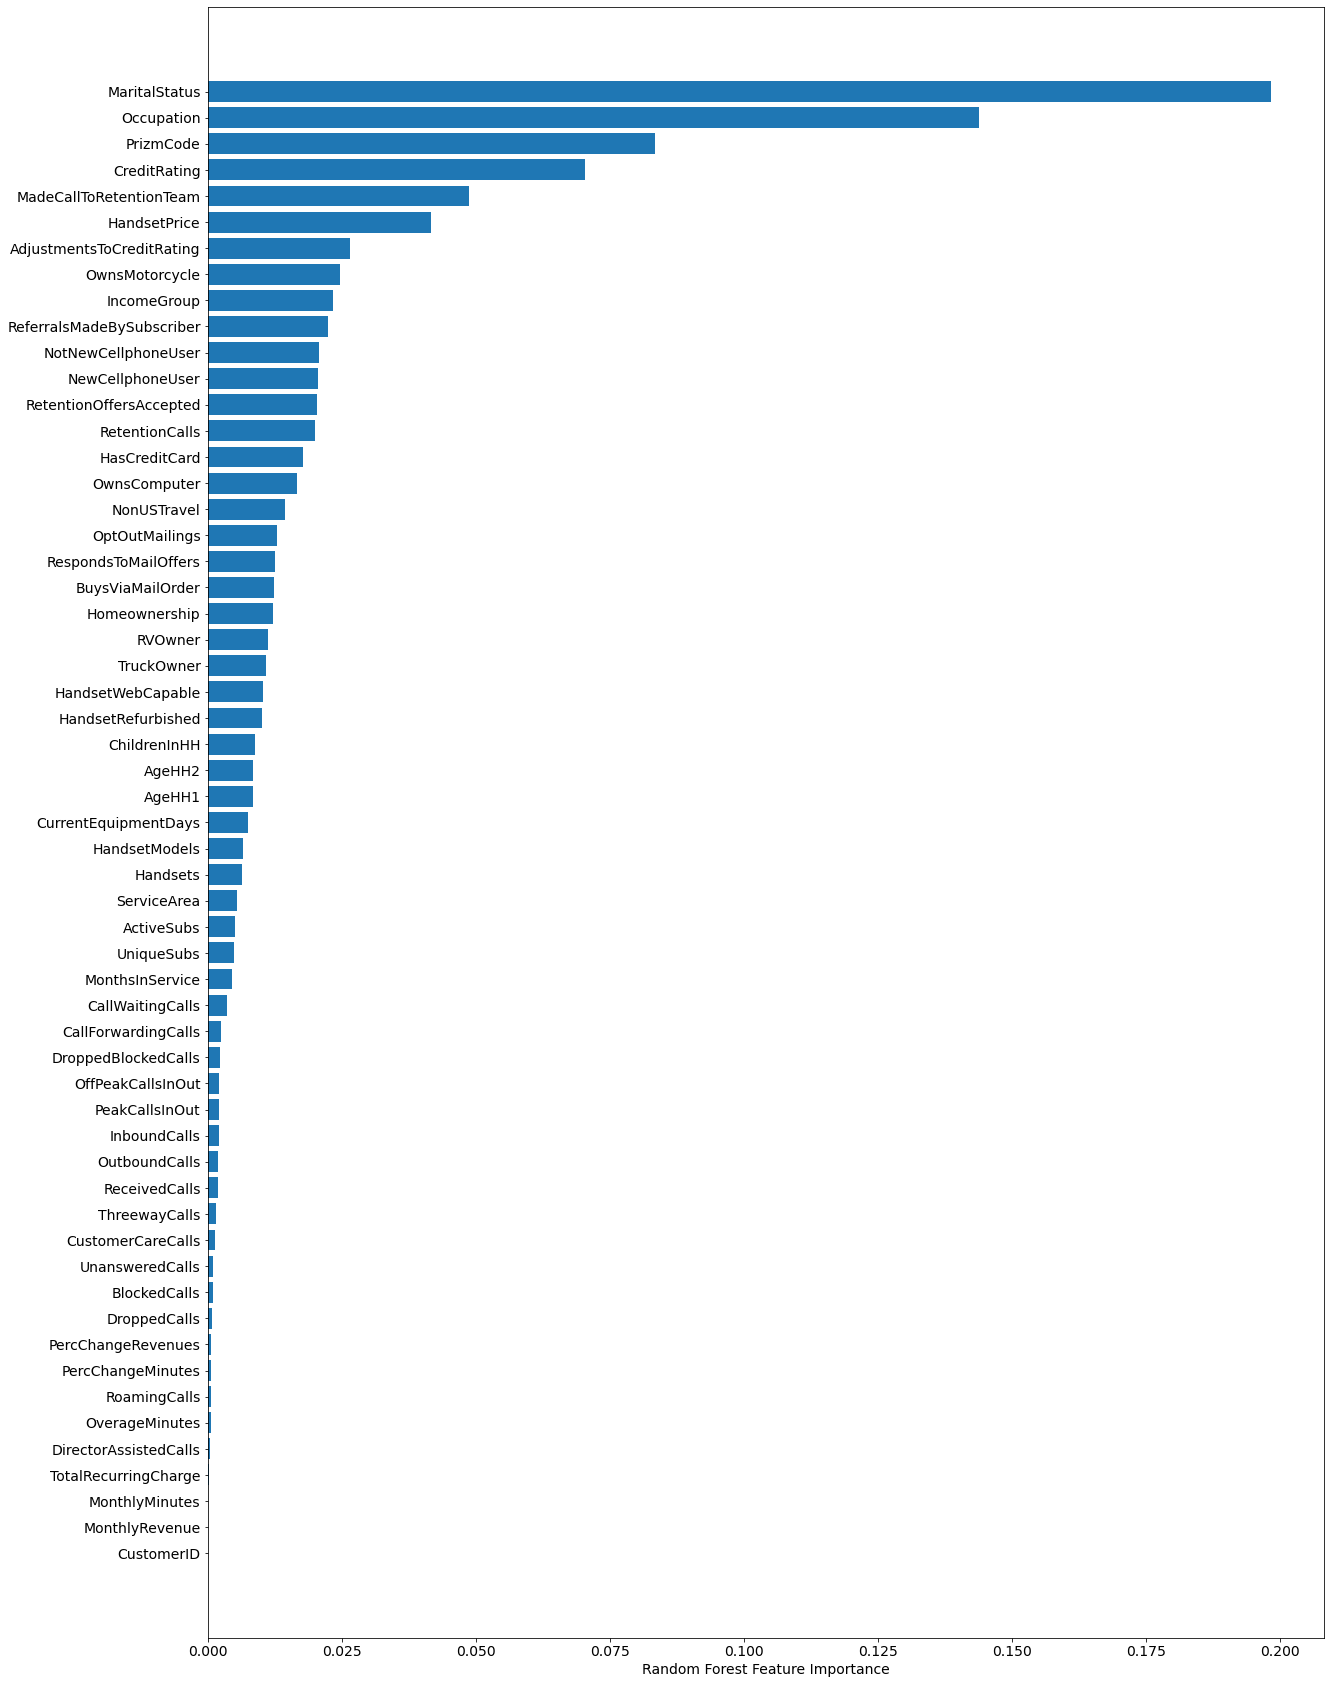

In [40]:
plt.figure(figsize=(20,30))
sorted_idx = rf.feature_importances_.argsort()
plt.barh(features, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


In [41]:
telco_train_dummy.drop(columns= ['CustomerID','ChildrenInHH','PrizmCode','Occupation', 'MaritalStatus','OwnsMotorcycle', 'AdjustmentsToCreditRating','RetentionOffersAccepted', 'NewCellphoneUser','NotNewCellphoneUser','ReferralsMadeBySubscriber','OptOutMailings', 'NonUSTravel','OwnsComputer', 'HasCreditCard','TruckOwner','RVOwner','Homeownership', 'BuysViaMailOrder','CallForwardingCalls','ThreewayCalls'], axis=1, inplace=True)

In [42]:
telco_train_dummy.head()

,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,UnansweredCalls,CustomerCareCalls,ReceivedCalls,OutboundCalls,InboundCalls,PeakCallsInOut,OffPeakCallsInOut,DroppedBlockedCalls,CallWaitingCalls,MonthsInService,UniqueSubs,ActiveSubs,ServiceArea,Handsets,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,HandsetRefurbished,HandsetWebCapable,RespondsToMailOffers,RetentionCalls,IncomeGroup,HandsetPrice,MadeCallToRetentionTeam,CreditRating
0,1,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,0.7,0.7,6.3,0.0,97.2,0.0,0.0,58.0,24.0,1.3,0.3,61,2,1,659,2.0,2.0,361.0,62.0,0.0,0,1,1,1,4,30.000000,1,0
1,1,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,0.3,0.0,2.7,0.0,0.0,0.0,0.0,5.0,1.0,0.3,0.0,58,1,1,611,2.0,1.0,1504.0,40.0,42.0,0,0,1,0,5,30.000000,0,3
2,0,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,0.0,0.0,0.0,0.0,0.4,0.3,0.0,1.3,3.7,0.0,0.0,60,1,1,353,1.0,1.0,1812.0,26.0,26.0,0,0,0,0,6,82.237933,0,2
3,0,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,52.0,7.7,76.0,4.3,200.3,370.3,147.0,555.7,303.7,59.7,22.7,59,2,2,611,9.0,4.0,458.0,30.0,0.0,0,1,1,0,6,10.000000,0,3
4,1,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53,2,2,564,4.0,3.0,852.0,46.0,54.0,0,0,1,0,9,10.000000,0,0


In [43]:
telco_train_dummy.shape

(51047, 37)

In [44]:
telco_train_dummy.to_csv('telco_selected_features.csv')


# Selected Features Training with Random Forest Classification

In [45]:
data_new=pd.read_csv('telco_selected_features.csv')
x=data_new.drop('Churn',axis=1)

In [46]:
y=data_new['Churn']
x.shape,y.shape

((51047, 37), (51047,))

In [47]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [48]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model_rf_smote=RandomForestClassifier(n_estimators=411, criterion='gini', random_state = 100,max_depth=40, min_samples_leaf=5)

In [51]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=40, min_samples_leaf=5, n_estimators=411,
                       random_state=100)

In [52]:
yr_predict1 = model_rf_smote.predict(xr_test)

In [53]:
model_score_r1 = model_rf_smote.score(xr_test, yr_test)

In [54]:
print(model_score_r1)
print(metrics.classification_report(yr_test, yr_predict1))

0.8205853244733493
              precision    recall  f1-score   support

           0       0.80      0.62      0.70      2392
           1       0.83      0.92      0.87      4681

    accuracy                           0.82      7073
   macro avg       0.82      0.77      0.79      7073
weighted avg       0.82      0.82      0.81      7073



In [55]:
print(metrics.confusion_matrix(yr_test, yr_predict1))

[[1484  908]
 [ 361 4320]]


###### With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

###### We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

###### Now we can see quite better results, i.e. Accuracy: 
83 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

# Optimization of Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 800, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,10,20,40,60]
# Minimum number of samples required to split a node
min_samples_split = [2, 5,20,40.60]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5,10,15.20]
# Method of selecting samples for training each tree
bootstrap = [True, False]
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [100, 177, 255, 333, 411, 488, 566, 644, 722, 800], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 10, 20, 40, 60], 'min_samples_split': [2, 5, 20, 40.6], 'min_samples_leaf': [1, 5, 10, 15.2], 'bootstrap': [True, False]}


In [57]:
rf_Model = RandomForestClassifier()
from sklearn.model_selection import RandomizedSearchCV
rf_RandomGrid = RandomizedSearchCV(estimator = rf_Model, param_distributions = param_grid, cv = 10, verbose=2, n_jobs = 4)

In [58]:
#bestF=rf_RandomGrid.fit(xr_train, yr_train)

In [59]:
#rf_RandomGrid.best_params_


In [60]:
model=RandomForestClassifier(bootstrap=True,max_depth=40,max_features='sqrt',min_samples_leaf=1,min_samples_split= 2,n_estimators=488)


In [61]:
model.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=40, max_features='sqrt', n_estimators=488)

In [62]:
yr_predict1 = model.predict(xr_test)

In [63]:
model_score = model.score(xr_test, yr_test)

In [64]:
print(model_score)
print(metrics.classification_report(yr_test, yr_predict1))

0.8285027569630992
              precision    recall  f1-score   support

           0       0.81      0.64      0.72      2392
           1       0.83      0.93      0.88      4681

    accuracy                           0.83      7073
   macro avg       0.82      0.78      0.80      7073
weighted avg       0.83      0.83      0.82      7073



In [65]:
'''print (f'Train Accuracy - : {rf_RandomGrid.score(xr_train,yr_train):.3f}')
print (f'Test Accuracy - : {rf_RandomGrid.score(xr_test,yr_test):.3f}')'''

"print (f'Train Accuracy - : {rf_RandomGrid.score(xr_train,yr_train):.3f}')\nprint (f'Test Accuracy - : {rf_RandomGrid.score(xr_test,yr_test):.3f}')"

# Artifical Neural Network and Its Optimization 

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import recall_score, confusion_matrix, roc_curve, auc

In [67]:
df_trans=pd.read_csv('telco_selected_features.csv')
x=data_new.drop('Churn',axis=1)
y=data_new['Churn']
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [68]:
# Define the target variable and features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]
features


['Unnamed: 0',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'ServiceArea',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'RespondsToMailOffers',
 'RetentionCalls',
 'IncomeGroup',
 'HandsetPrice',
 'MadeCallToRetentionTeam',
 'CreditRating']

In [69]:
# Define the target variable and features
target = 'Churn'
features = [x for x in list(df_trans.columns) if x != target]

# Define the model
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size=0.2,
                                                    random_state=23)
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=100)

Epoch 1/50
283/283 [==============================] - 1s 2ms/step - loss: 23.3298 - accuracy: 0.5172
Epoch 2/50
283/283 [==============================] - 0s 2ms/step - loss: 5.5343 - accuracy: 0.5916
Epoch 3/50
283/283 [==============================] - 0s 2ms/step - loss: 6.0239 - accuracy: 0.5878
Epoch 4/50
283/283 [==============================] - 0s 1ms/step - loss: 4.9465 - accuracy: 0.5931
Epoch 5/50
283/283 [==============================] - 0s 2ms/step - loss: 5.1745 - accuracy: 0.5903
Epoch 6/50
283/283 [==============================] - 0s 1ms/step - loss: 5.7757 - accuracy: 0.5924
Epoch 7/50
283/283 [==============================] - 0s 1ms/step - loss: 4.1999 - accuracy: 0.6035
Epoch 8/50
283/283 [==============================] - 0s 2ms/step - loss: 4.4186 - accuracy: 0.5993
Epoch 9/50
283/283 [==============================] - 0s 1ms/step - loss: 5.4123 - accuracy: 0.5938
Epoch 10/50
283/283 [==============================] - 0s 1ms/step - loss: 6.5512 - accuracy: 0.598

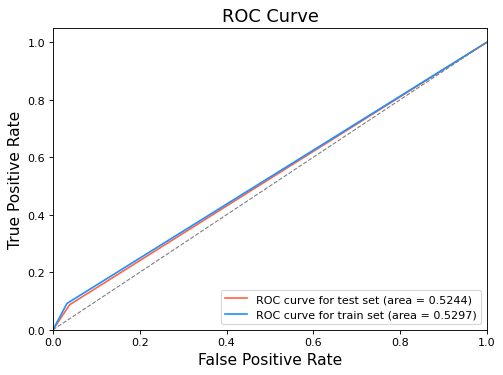

In [70]:
# Get predictions
train_set_preds = [round(x[0]) for x in model.predict(X_train)]
test_set_preds = [round(x[0]) for x in model.predict(X_test)]

# Get AUC and ROC
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, train_set_preds)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_set_preds)
train_roc_auc = auc(train_fpr, train_tpr)
test_roc_auc = auc(test_fpr, test_tpr)

# Visualize ROC curve
plt.figure(figsize=(7, 5), dpi=80)
plt.plot(test_fpr,
         test_tpr,
         color='tomato',
         label='ROC curve for test set (area = %0.4f)' % test_roc_auc)
plt.plot(train_fpr,
         train_tpr,
         color='dodgerblue',
         label='ROC curve for train set (area = %0.4f)' % train_roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve', fontsize=16)
plt.legend(loc="lower right")

plt.show()


# Optimizing NN: Tuning batch and epoch

# part 1 - Tuning batch and epoch

In [71]:
# Importing necesary packages
import numpy
import pandas as pd
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential
from keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')
from keras.wrappers.scikit_learn import KerasClassifier

In [72]:
# Function to create model,for KerasClassifier
def create_my_model():
    #defining my model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=len(features), activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    mymodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return mymodel

In [73]:
# create model
model = KerasClassifier(build_fn=create_my_model)

In [74]:
# define the grid search parameters
batchSize = [10, 20, 40, 60, 80, 100]
epochs = [10, 30, 50]

In [75]:
# define the grid search parameters
parameter_grid = dict(batch_size=batchSize, epochs=epochs)
mygrid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = mygrid.fit(X_resampled, y_resampled)

Epoch 1/10
884/884 [==============================] - 2s 1ms/step - loss: 350.3429 - accuracy: 0.5474
Epoch 2/10
884/884 [==============================] - 1s 1ms/step - loss: 4.0216 - accuracy: 0.5941
Epoch 3/10
884/884 [==============================] - 1s 1ms/step - loss: 2.8901 - accuracy: 0.6045
Epoch 4/10
884/884 [==============================] - 1s 1ms/step - loss: 3.0541 - accuracy: 0.6015
Epoch 5/10
884/884 [==============================] - 1s 1ms/step - loss: 2.8245 - accuracy: 0.6089
Epoch 6/10
884/884 [==============================] - 1s 1ms/step - loss: 2.7303 - accuracy: 0.6102
Epoch 7/10
884/884 [==============================] - 1s 1ms/step - loss: 2.4027 - accuracy: 0.6153
Epoch 8/10
884/884 [==============================] - 1s 1ms/step - loss: 2.9517 - accuracy: 0.6107
Epoch 9/10
884/884 [==============================] - 1s 1ms/step - loss: 2.3929 - accuracy: 0.6203
Epoch 10/10
884/884 [==============================] - 1s 1ms/step - loss: 2.9462 - accuracy: 0.61

In [76]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.600164 using {'batch_size': 40, 'epochs': 10}


# part 2- Optimizing Activation Function

In [81]:
# Function to create model
def create_my_model(optimizer='adam'):
    # create model
    mymodel = Sequential()
    mymodel.add(Dense(12, input_dim=len(features), activation='relu'))
    mymodel.add(Dense(1, activation='sigmoid'))
    # Compile model
    mymodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return mymodel

In [82]:
# create model
model = KerasClassifier(build_fn=create_my_model, epochs=50, batch_size=10)

In [83]:
# define the grid search parameters
optimizer = ['SGD','Adadelta', 'RMSprop', 'Adagrad','Adam']
parameter_grid = dict(optimizer=optimizer)

In [86]:
grid = GridSearchCV(estimator=model, param_grid=parameter_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_resampled, y_resampled)

Epoch 1/50
3536/3536 [==============================] - 5s 1ms/step - loss: 198.5442 - accuracy: 0.5916
Epoch 2/50
3536/3536 [==============================] - 5s 1ms/step - loss: 6.0233 - accuracy: 0.6037
Epoch 3/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.8855 - accuracy: 0.6150
Epoch 4/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.8788 - accuracy: 0.6242
Epoch 5/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.9483 - accuracy: 0.6223
Epoch 6/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.2846 - accuracy: 0.6303
Epoch 7/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.6539 - accuracy: 0.6281
Epoch 8/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.2155 - accuracy: 0.6335
Epoch 9/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.5425 - accuracy: 0.6283
Epoch 10/50
3536/3536 [==============================] - 5s 1ms/step - loss: 4.1

In [ ]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.680990 using {'optimizer': 'SGD'}
